In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [32]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
#recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date = engine.execute('SELECT max(date) FROM measurement').fetchall()
recent_date

[('2017-08-23',)]

Text(0, 0.5, 'Precipition')

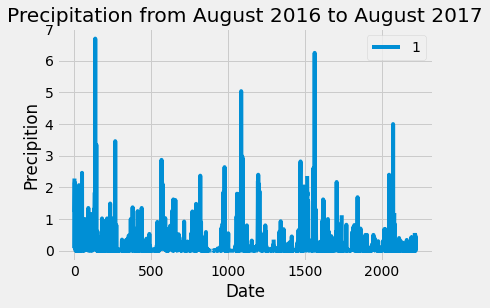

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.datetime(2017,8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
scores_precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year).\
order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
yearly_precipitation = pd.DataFrame(scores_precipitation)
yearly_precipitation.set_index(0)

# Sort the dataframe by date
yearly_precipitation = yearly_precipitation.sort_index(ascending = True)
yearly_precipitation.head()

# Use Pandas Plotting with Matplotlib to plot the data

yearly_precipitation.plot()
plt.title('Precipitation from August 2016 to August 2017')
plt.xlabel('Date')
plt.ylabel('Precipition')

In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearly_precipitation.describe()

,1
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number stations in the dataset
Station_exploratory = session.query(Station).count()
Station_exploratory

9

In [60]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Station_active = (session.query(Measurement.station, func.count(Measurement.station)).\
                 group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
Station_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [65]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Active_temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == Most_Active).\
    filter(Measurement.date > last_year).order_by(Measurement.date).all()
Most_station = pd.DataFrame(Active_temperature)
Most_station

,0,1,2
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0
...,...,...,...
346,USC00519281,2017-08-14,77.0
347,USC00519281,2017-08-15,77.0
348,USC00519281,2017-08-16,76.0
349,USC00519281,2017-08-17,76.0


Text(0, 0.5, 'Observations')

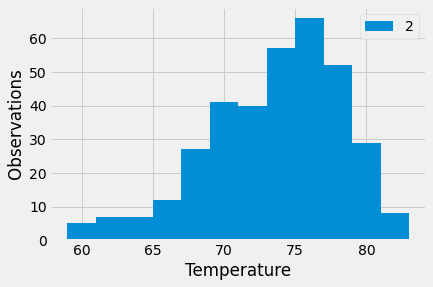

In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Most_station.set_index(0)
Most_station.plot.hist(bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Observations")

# Close session

In [ ]:
# Close Session
session.close()